# Julia
---
<img src="https://docs.julialang.org/en/v1/assets/logo.svg" style="width: 20%;"/>

科学计算对性能一直有着最高的需求，但目前各领域的专家却大量使用较慢的动态语言来开展他们的日常工作。Julia 是一个面向科学计算和数值计算的高性能动态高级程序设计语言，性能可与传统的静态类型语言媲美。作为一门支持过程式、函数式和面向对象的多范式语言，它像 R、MATLAB 和 Python 一样简单，在高级数值计算方面有丰富的表现力，并且支持通用编程。 

## 语言特点

* 调用许多其它成熟的高性能基础代码，如线性代数、随机数生成、快速傅里叶变换、字符串处理。
* 丰富的用于创建或描述对象的类型语法。
* 高性能，接近于静态编译型语言，包括用户自定义类型等。
* 为并行计算和分布式计算而设计。
* 优雅的可扩展的类型转换/提升。
* 可直接调用 C 函数（不需要包装或是借助特殊的 API）。
* 有类似 shell 的进程管理能力。
* 有类似 Lisp 的宏以及其它元编程工具。
* 可与 Jupyter notebook 一起使用。

## 与Python的语法区别

* 对数组、字符串等索引。Julia 索引的下标是从 1 开始，而不是从 0 开始
* 索引列表和数组的最后一个元素时，Julia 使用 end ，Python 使用 -1
* Julia 中的 Comprehensions （还）没有条件 if 语句
* for, if, while, 等块的结尾需要 end ；不强制要求缩进排版
* Julia 没有代码分行的语法：如果在一行的结尾，输入已经是个完整的表达式，就直接执行；否则就继续等待输入。强迫 Julia 的表达式分行的方法是用圆括号括起来
* Julia 总是以列为主序的（类似 Fortran ），而 numpy 数组默认是以行为主序的（类似 C ）。如果想优化遍历数组的性能，从 numpy 到 Julia 时应改变遍历的顺序。

Julia是免费开源语言。本Jupyter文档使用了[IJulia后端](https://github.com/JuliaLang/IJulia.jl)。

## 参考资料
[Julia官方教程](https://docs.juliacn.com/latest/manual/getting-started) 

[Julia菜鸟教程](https://www.runoob.com/julia/julia-tutorial.html)

# 1. 了解Julia
---

## 目录

- [字符串（Strings）](#字符串)
- [数据结构（Data structures）](#数据结构)
    - [元组（Tuples）](#元组（Tuples）)
    - [字典（Dictionaries）](#字典（Dictionaries）)
    - [数组（Arrays）](#数组（Arrays）)
- [循环（Loops）](#循环)
    - [`for` 循环](#for-循环)
    - [`while` 循环](#while-循环)
- [条件判断（Conditionals）](#条件判断)
    - [`if` 分支](#if-分支)
    - [三元运算符](#三元运算符)
- [函数（Functions）](#函数)
    - [如何声明一个函数](#如何声明一个函数)
    - [Julia 中的鸭子类型（Duck-typing）](#Julia-中的鸭子类型（Duck-typing）)
    - [调用函数](#调用函数)
    - [原地修改与非原地修改函数（Mutating vs. non-mutating functions）](#原地修改与非原地修改函数（Mutating-vs.-non-mutating-functions）)
    - [一些高阶函数](#一些高阶函数)
    - [广播（broadcast）](#广播（broadcast）)

## 字符串
---

In [1]:
string1 = "How many cats "

"How many cats "

In [2]:
string2 = "is too many cats?"

"is too many cats?"

In [3]:
string(string1, string2)

"How many cats is too many cats?"

In [4]:
😺 = 10
println("I don't know but $😺 are too few!")

I don't know but 10 are too few!


注意：Julia 允许用 Unicode 字符，例如😺

## 数据结构
---

### 元组（Tuples）

要创建创建一个元组，就用小括号依次`( )`括起一系列元素

语法：

(item1, item2, ...)

In [5]:
myfavoriteanimals = ("penguins", "cats", "sugargliders")

("penguins", "cats", "sugargliders")

In [6]:
myfavoriteanimals[1]  # 索引从1开始到end结束

"penguins"

### 数组（Arrays）

不同于元组，数组可变；不同于字典，数组有序。

要创建创建一个数组，用方括号依次 `[ ]` 括起一系列元素。

语法：

[item1, item2, ...]

In [7]:
myfriends = ["Ted", "Robyn", "Barney", "Lily", "Marshall"]

5-element Vector{String}:
 "Ted"
 "Robyn"
 "Barney"
 "Lily"
 "Marshall"

In [8]:
fibonacci = [1, 1, 2, 3, 5]

5-element Vector{Int64}:
 1
 1
 2
 3
 5

In [9]:
mixture = [1, 1, 2, 3, "Ted", "Robyn"]

6-element Vector{Any}:
 1
 1
 2
 3
  "Ted"
  "Robyn"

数组可以包含其他数据结构，也可以包含其他数组变成高维数组。

In [10]:
numbers = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

3-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5]
 [6, 7, 8, 9]

In [11]:
rand(4, 3)

4×3 Matrix{Float64}:
 0.344433  0.129792  0.59016
 0.996064  0.89842   0.107475
 0.102968  0.994724  0.705492
 0.648497  0.109975  0.413651

## 循环
---

### for 循环

`for` 循环语法：
```julia
for <var> in <loop iterable>
    <loop body>
end
```

In [12]:
for n in 1:5
    println(n)  # 相较 print函数多了换行
end

1
2
3
4
5


### while 循环

`while` 循环语法：
```julia
while <condition>
    <loop body>
end
```

In [13]:
n = 0
while n < 6
    n += 1
    println(n)
end

1
2
3
4
5
6


## 条件判断
---

### if 分支

Julia 中 `if` 语法为：

```julia
if <condition 1>
    <option 1>
elseif <condition 2>
    <option 2>
else
    <option 3>
end
```

这让我们可以按条件执行不同的语句

In [14]:
x, y = 1, 2
if x > y
    x
else
    y
end

2

### 三元运算符

我们可以用三元运算符语法重写上一个代码块

```julia
a ? b : c
```

它等价于

```julia
if a
    b
else
    c
end
```

In [15]:
(x > y) ? x : y

2

## 函数
---

将要谈论的主题：
1. 如何声明一个函数
2. Julia 中的鸭子类型（Duck-typing）
3. 原地修改与非原地修改函数（Mutating vs. non-mutating functions）
4. 高阶函数

### 如何声明一个函数

#### 方法一：用 `function` 和 `end` 关键字

In [16]:
function f(x)
    x^2
end

f (generic function with 1 method)

#### 方法二：用 `=`

In [17]:
f2(x) = x^2

f2 (generic function with 1 method)

#### 方法三：匿名函数

In [18]:
f3 = x -> x^2

#1 (generic function with 1 method)

### 调用函数

In [19]:
f(42)

1764

In [20]:
f2(42)

1764

In [21]:
f3(42)

1764

### Julia 中的鸭子类型（Duck-typing）
> *“假如它嘎嘎像个鸭鸭，那它就是个鸭鸭”*

在未指定函数参数的类型时，不管输入参数是什么类型，只要函数体可以正常执行，
那么 Julia 函数就可以应用在这种类型的参数上  
比如上面的 `f` 函数可以接受一个矩阵（matrix）作为参数

In [22]:
A = rand(3, 3)

3×3 Matrix{Float64}:
 0.394433  0.192698  0.189776
 0.832738  0.206822  0.0190963
 0.352175  0.728618  0.493466

In [23]:
f(A)

3×3 Matrix{Float64}:
 0.382878  0.254135  0.172182
 0.507413  0.217156  0.171407
 0.919444  0.578106  0.324257

然而，`f` 函数无法接受一个向量（vector）。
不同于 `A^2` 是已经定义好的矩阵乘方，当 `v` 是向量时的 `v^2` 是未定义的，会导致错误。

In [24]:
v = rand(3)

3-element Vector{Float64}:
 0.7337255216935006
 0.4921946845848877
 0.5995337077432299

In [25]:
try
    f(v)
catch e
    println("MethodError: no method matching")
end

MethodError: no method matching


### 原地修改与非原地修改函数（Mutating vs. non-mutating functions）

约定：函数名以 `!` 结束的原地修改传入的变量，函数名非以 `!` 结束的则不会改变传入的变量。

例如下面的 `sort` 和 `sort!`

In [26]:
v = [3, 5, 2]

3-element Vector{Int64}:
 3
 5
 2

In [27]:
sort(v)

3-element Vector{Int64}:
 2
 3
 5

In [28]:
v

3-element Vector{Int64}:
 3
 5
 2

`sort(v)`会返回一个新的、将 `v` 排序后的数组，`v` 本身不会改变  

而当执行 `sort!(v)` 后，`v` 将会被原地排序修改

In [29]:
sort!(v)

3-element Vector{Int64}:
 2
 3
 5

In [30]:
v

3-element Vector{Int64}:
 2
 3
 5

### 一些高阶函数

#### map函数

`map` 是 Julia 中的高阶函数。“高阶”指的是它会*接受一个函数*作为它的传入参数。
`map` 将传入的函数作用于传入的数据结构的每一个元素。例如执行

```julia
map(f, [1, 2, 3])
```
将得到一个输出数组，数组的每一个元素为 `f` 作用在数组 `[1, 2, 3]` 的对应元素
```julia
[f(1), f(2), f(3)]
```

In [31]:
map(f, [1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

这里我们把向量 `[1, 2, 3]` 的每一个元素都平方了，而不是对向量 `[1, 2, 3]` 本身进行平方。

`map` 可以接受匿名函数作为参数，像这样

In [32]:
map(x -> x^3, [1, 2, 3])

3-element Vector{Int64}:
  1
  8
 27

这就完成了对数组 `[1, 2, 3]` 所有元素立方的计算！

### 广播（broadcast）

广播（`broadcast`）和 `map` 一样也是高阶函数。
广播是一种广义化的 `map`，所以 `map` 能做的它都能做。并不止如此，广播的调用方法和 `map` 一样。

In [33]:
broadcast(f, [1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

我们又一次通过函数 `f` 把向量 `[1, 2, 3]` 的每一个元素都平方了
——这次是用“广播”函数 `f` 的方式！

广播（`broadcast`）有个语法糖：调用要广播的函数时，在函数名和输入变量之间加一个 `.`。

比如：
```julia
broadcast(f, [1, 2, 3])
```
就等价于
```julia
f.([1, 2, 3])
```

In [34]:
f.([1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

再一次强调 `map` 和广播方式与如下直接调用函数的区别。

```julia
f([1, 2, 3])
```
我们可以求向量中每个元素的平方，但是不能求向量的平方！

为了再讲清楚这一点，我们再看一下以下调用的区别

```julia
f(A)
```
与
```julia
f.(A)
```
其中 `A` 是个矩阵：

In [35]:
A = [i + 3*j for j in 0:2, i in 1:3]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [36]:
f(A)

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

和之前一样，对于矩阵 `A` 来说
```
f(A) = A^2 = A * A
``` 

另一方面，

In [37]:
B = f.(A)

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

结果包含了矩阵 `A` 中每个元素的平方

广播的点语法让比较复杂的元素间运算的表示更自然、更贴近数学表示。

例如：

In [38]:
C = A .+ 2 .* f.(A) ./ A

3×3 Matrix{Float64}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

而不是

In [39]:
broadcast(x -> x + 2 * f(x) / x, A)

3×3 Matrix{Float64}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

并且这么写仍然能获得和 C 语言一样高效的代码！

# 2. Julia中的线性代数
---

## 目录
 - [基础线性代数操作](#基础线性代数操作)
    - [乘法](#乘法)
    - [转置](#转置)
    - [转置的乘法](#转置的乘法)
    - [解线性方程组](#解线性方程组)
 - [特殊的矩阵结构](#特殊的矩阵结构)
     - [大规模问题](#大规模问题)

## 基础线性代数操作
---

定义一个随机矩阵

In [40]:
A = rand(1:4,3,3)

3×3 Matrix{Int64}:
 1  4  3
 3  2  1
 2  3  4

定义一个元素全为 1 的向量

In [41]:
x = fill(1.0, (3))

3-element Vector{Float64}:
 1.0
 1.0
 1.0

注意 $A$ 的类型为 `Array{Int64,2}`，而 $x$ 的类型为 `Array{Float64,1}`。

Julia 定义 `Array{Type,1}` 的别名为向量 `Vector{Type}`，`Array{Type,2}` 的别名为矩阵 `Matrix{Type}` 。

许多线性代数的基础操作和其他语言一样

### 乘法

In [42]:
b = A*x

3-element Vector{Float64}:
 8.0
 6.0
 9.0

### 转置
就像在其他语言中 `A'` 表示对 `A` 进行共轭转置

In [43]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  3  2
 4  2  3
 3  1  4

我们还可以通过 `transpose` 函数获得转置矩阵

In [44]:
transpose(A)

3×3 transpose(::Matrix{Int64}) with eltype Int64:
 1  3  2
 4  2  3
 3  1  4

### 转置的乘法
Julia 中某些情况下可以省略 `*` 号

In [45]:
A'A

3×3 Matrix{Int64}:
 14  16  14
 16  29  26
 14  26  26

### 解线性方程组
用方阵 $A$ 表示的线性方程组 $Ax=b$ 可以用左除运算符（函数）`\` 求解

In [46]:
A\b

3-element Vector{Float64}:
 1.0
 1.0
 1.0

## 特殊的矩阵结构

矩阵结构在线性代数中非常重要。
接触一下大一些的线型系统就可以看到矩阵结构有*多*重要了。

用线性代数标准包 `LinearAlgebra` 可以获得结构化的矩阵（structured matrices）：

In [47]:
using LinearAlgebra

In [48]:
n = 1000
A = randn(n,n);

Julia 可以推断特殊矩阵结构，比如判断对称矩阵

In [49]:
Asym = A + A'
issymmetric(Asym)

true

但有时候浮点错误会比较麻烦

In [50]:
Asym_noisy = copy(Asym)
Asym_noisy[1,2] += 5eps()

1.2233107710007431

In [51]:
issymmetric(Asym_noisy)

false

幸运的是我们可以通过如 `Diagonal`，`Triangular`，`Symmetric`，`Hermitian`，`Tridiagonal` 
和 `SymTridiagonal` 这样的函数来明确地创建矩阵

In [52]:
Asym_explicit = Symmetric(Asym_noisy);

我们来看看 Julia 计算 `Asym`，`Asym_noisy` 和 `Asym_explicit` 的特征值各要花多少时间

In [53]:
@time eigvals(Asym);

  0.955129 seconds (649.08 k allocations: 45.699 MiB, 3.73% gc time, 62.37% compilation time)


In [54]:
@time eigvals(Asym_noisy);

  3.546191 seconds (13 allocations: 7.920 MiB, 2.42% gc time)


In [55]:
@time eigvals(Asym_explicit);

  0.396613 seconds (5.93 k allocations: 8.357 MiB, 3.87% compilation time)


本例中，使用 `Symmetric()` 处理 `Asym_noisy` 后让计算效率提高了约5倍

### 大规模问题
使用 `Tridiagonal` 和 `SymTridiagonal` 类型储存三对角矩阵（tridiagonal matrices）
让处理大规模的三对角矩阵问题变为可能。

以下问题如果使用稠密的 `Matrix` 类型储存，在个人计算机上是无法进行求解的。

In [56]:
n = 1_000_000;
A = SymTridiagonal(randn(n), randn(n-1));
@time eigmax(A)

  1.379860 seconds (848.42 k allocations: 230.630 MiB, 21.42% gc time, 36.10% compilation time)


6.793216740359156

# 3. Julia软件包
---

Julia 有超过 2000 个登记在案的包，这使得第三方的软件包成为 Julia 语言生态的重要组成部分。
尽管如此，软件包生态依然有很大的成长空间。

值得一提的是，在 Julia 中调用其它语言的函数也是一等公民。Julia 提供了很棒的外部函数接口（FFI）。  
我们可以很容易地通过 `PyCall` 或 `Rcall` 调用 Python 或 R。
这意味着你不必等到 Julia 的生态完全成熟就能迁移现有项目到 Julia，
而且迁移到 Julia 并不意味着放弃你在其他语言中惯用的包或者库！

查看全部可获得的包，请看
https://pkg.julialang.org/
或者
https://juliaobserver.com/

现在我们先学习一下该如何使用包。

在安装好的 Julia 中第一次要使用一个包的时候，你需要用包管理器（package manager）明确添加（add）它：

```julia
using Pkg
Pkg.add("Example")
```

之后每次使用 Julia 时（比如打开一个新的 REPL 会话或者第一次打开一个 notebook），
你需要通过 `using` 关键字载入要用的包

In [57]:
using Example

在 `Example.jl` 的源码
https://github.com/JuliaLang/Example.jl/blob/master/src/Example.jl
中我们可以看到声明了下面这个函数

```julia
hello(who::String) = "Hello, $who"
```

载入了 `Example` 我们现在应该可以调用 `hello` 函数了

In [58]:
hello("it's me. I was wondering if after all these years you'd like to meet.")

"Hello, it's me. I was wondering if after all these years you'd like to meet."

现在让我们来玩 `Colors` 包吧

```julia
using Pkg
Pkg.add("Colors")
```

In [59]:
using Colors

首先创建一个 100 个不同颜色的调色板

In [60]:
palette = distinguishable_colors(100)

然后通过 `rand` 函数来创建随机矩阵

In [61]:
rand(3, 3)

3×3 Matrix{Float64}:
 0.347721  0.619851  0.889116
 0.250999  0.445572  0.921988
 0.335002  0.967117  0.662008

In [62]:
rand(1:10, 3, 3)

3×3 Matrix{Int64}:
 7   3  6
 5   1  8
 1  10  8

In [63]:
rand(palette, 3, 3)

# 4. Julia绘图
---

Julia 有包括调用 `PyPlot` 在内的、多种不同的绘图方式。

这里将介绍如何使用 `Plots.jl`。

```julia
using Pkg
Pkg.add("Plots")
```

In [64]:
using Plots

`Plots.jl` 的优势之一是可以无缝地切换后端（backends）。
在这个 notebook 中，我们将尝试 `gr()` 和 `plotlyjs()` 后端。 

以科学调查之名，我们用这个 notebook 调查一下大概1860到2000年的全球温度和海盗数量的关系。

In [65]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17]

6-element Vector{Int64}:
 45000
 20000
 15000
  5000
   400
    17

要绘制出图线，先载入GR后端

In [66]:
gr()

Plots.GRBackend()

现在我们可以调用如 `plot` 和 `scatter` 的函数来绘制图像。

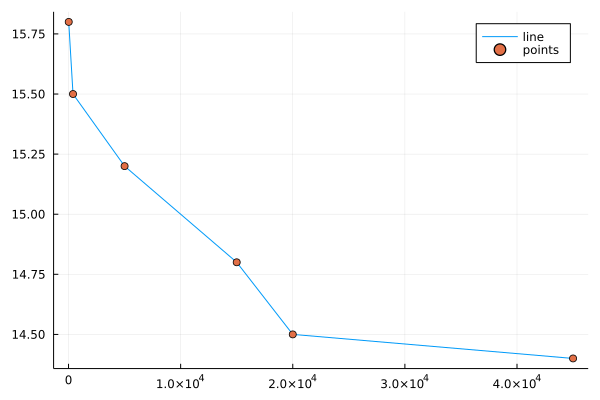

In [67]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 

`scatter!` 函数名后面的 `!` 意味着它是一个原地修改传入变量的函数，表示散点图会被添加到已存在的图像上。

与此对应的，你可以试试换成 `scatter` 看看会发生什么。

接着，我们通过 `xlabel!`，`ylabel!` 和 `title!` 函数来给图像加上更多信息。

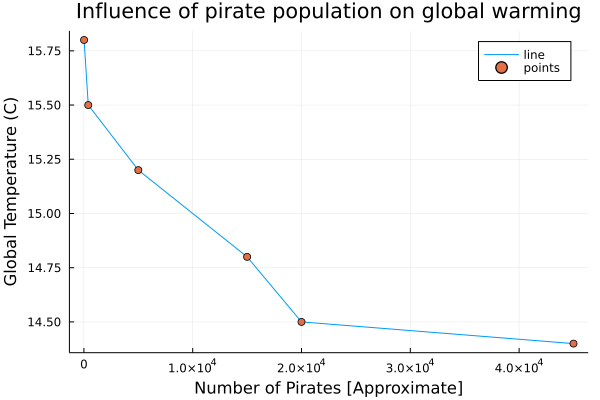

In [68]:
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

这看上去仍不对劲。自1860以来海盗数量是减少的，而从左往右看其实时间上是倒序的。
我们来把 X 轴反过来，可以更清楚地看到时间顺序下海盗人口是如何导致全球温度的变化！

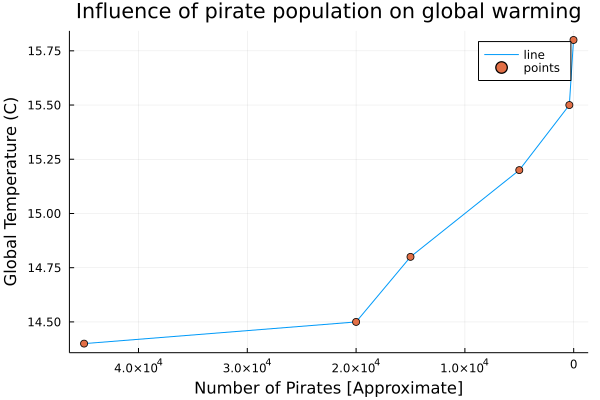

In [69]:
xflip!()

绘图就是这样简单！

**注意** 这是一个关于人们是如何经常结合相关性和因果性的笑话。

不需要修改语法，我们可以在 `unicodeplots()` 后端中绘制同样的图像

In [70]:
unicodeplots()

Plots.UnicodePlotsBackend()

In [71]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

                          Influence of pirate population on global warming       
                          +----------------------------------------+       
                   15.842 | ⚬                                      | line  
                          | |                                      | points
                          | \                                      |       
                          | ⚬                                      |       
                          | |*.                                    |       
                          | | \.                                   |       
                          | |  "⚬.                                 |       
   Global Temperature (C) | |    "*.                               |       
                          | |      "*.                             |       
                          | |        "*.                           |       
                          | |          "⚬.                         |       
      

注意到第二幅图和第一幅的区别！

# 5. 多重派发
---

在这个 notebook 中我们将探索 Julia 的重要特性之一：**多重派发**。

多重派发让软件更**通用（generic）、更快**！

## 目录

- [从熟悉的开始讲](#从熟悉的开始讲)
- [指定传入变量的类型](#指定传入变量的类型)

## 从熟悉的开始讲

从我们已经接触过的知识来理解多重派发。

我们可以声明一个 Julia 函数而不用给出传入变量的任何类型信息：

In [72]:
f(x) = x^2

f (generic function with 1 method)

Julia 自会判断哪些传入变量是合理的，哪些又是不合理的：

In [73]:
f(10)

100

In [74]:
try
    f([1, 2, 3])
catch e
    println("MethodError: no method matching")
end

MethodError: no method matching


## 指定传入变量的类型

但是，我们*也可以*显式地指定传入变量的类型。

比如，我们写一个只接受字符串类型传入变量的函数 `foo`。

In [75]:
foo(x::String, y::String) = println("My inputs x and y are both strings!")

foo (generic function with 1 method)

可以看到，要限制 `x` 和 `y` 的类型为 `String`，只要在形参名后面加上两个冒号和关键字 `String` 就行了。

现在 `foo` 只有在传入变量为 `String` 类型才正常工作。

In [76]:
foo("hello", "hi!")

My inputs x and y are both strings!


In [77]:
try
    foo(3, 4)
catch e
    println("MethodError: no method matching")
end

MethodError: no method matching


要让 `foo` 函数接受整型（`Int`）的传入变量，只要在声明 `foo` 函数时在形参后面加上 `::Int`。

In [78]:
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")

foo (generic function with 2 methods)

In [79]:
foo(3, 4)

My inputs x and y are both integers!


现在函数 `foo` 能接受整型变量了！但是注意，函数 `foo` 仍然能接受字符串变量！

In [80]:
foo("hello", "hi!")

My inputs x and y are both strings!


这就涉及到多重派发的核心了。当我们声明

```julia
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")
```
我们并没有重写或覆盖
```julia
foo(y::String, y::String)
```
而是给叫做 `foo` 的**通用函数（generic function）**添加了一个**新方法（method）**。

一个**通用函数** 是一个表示特定操作的抽象概念。  
举个例子，通用函数 `+` 代表了加法这个概念

一个**方法** 是一个**通用函数** 接受*特定参数类型* 的一个具体实现。  
举个例子，`+` 有279种方法（julia v1.6.4）以接受浮点数、整型、矩阵等等。

我们可以通过函数 `methods` 来查看函数 `foo` 有多少种方法。

In [81]:
methods(foo)

# 2 methods for generic function "foo":
[1] foo(x::String, y::String) in Main at In[75]:1
[2] foo(x::Int64, y::Int64) in Main at In[78]:1

所以，我们现在可以在调用 `foo` 的时候传入整型或字符串了。
当你调用 `foo` 时传入特定组合的参数时，Julia 将根据传入参数的类型派发对应的方法。*这* 就是多重派发。

多重派发让我们的代码更加通用更加快。
代码更加通用更灵活是因为我们是在写代码描述抽象操作例如加法和乘法，而不是描述具体的实现。
同时，因为 Julia 可以为相关类型调用高效的方法，代码可以运行得很快。

想查看我们调用一个通用函数时派发的是哪个方法，我们可以用宏 `@which`：

In [82]:
@which foo(3, 4)

foo(x::Int64, y::Int64) in Main at In[78]:1

In [83]:
@which 3.0 + 3.0

+(x::Float64, y::Float64) in Base at float.jl:326

考虑到一个特别写给浮点数的方法派发给了 `3.0 + 3.0`，生成的 LLVM 代码极其简练：

In [84]:
@code_llvm 3.0 + 3.0

;  @ float.jl:326 within `+'
define double @"julia_+_6884"(double %0, double %1) {
top:
  %2 = fadd double %0, %1
  ret double %2
}


要注意的是 Julia 在我们写一般的函数定义时也很快，因为具体的、定制的方法最终是在后台调用的。

举个例子，我们声明加法函数 `myadd` 时没有类型注释——

In [85]:
myadd(x, y) = x + y

myadd (generic function with 1 method)

虽然我们没有限制 `x` 和 `y` 的类型，但是 `myadd(3.0, 3.0)` 生成的 LLVM 代码和 `3.0 + 3.0` 差不多

In [86]:
@code_llvm myadd(3.0, 3.0)

;  @ In[85]:1 within `myadd'
define double @julia_myadd_6938(double %0, double %1) {
top:
; ┌ @ float.jl:326 within `+'
   %2 = fadd double %0, %1
; └
  ret double %2
}


# 6. Julia非常快
---

基准数值测试程序（benchmarks）通常被用来比较编程语言的性能。

这些 benchmarks 可能引起很多的讨论，首先是作为基准测试的到底是什么，再有就是究竟是什么导致不同语言间的差异。

这些简单的问题有时比你乍想之下复杂得多。

## `sum`: 一个简单易懂的函数

考虑**求和**函数 `sum(a)`，它是用来计算
$$\mathrm{sum}(a) = \sum_{i=1}^n a_i$$
其中 $n$ 是 `a` 的长度。

In [87]:
a = rand(10^7)  # 在[0,1)上均匀分布的随机数组成的1维向量
sum(a)

5.000462152725736e6

预期结果应该在 $0.5 \times 10^7$ 左右，因为所有元素的平均值应该是 0.5 左右

## 不同语言中的各种基准测试

In [88]:
@time sum(a)

  0.035919 seconds (1 allocation: 16 bytes)


5.000462152725736e6

`@time` 宏会产生受干扰的结果，所以不是做基准测试的最佳选择！

好在 Julia 有个 `BenchmarkTools.jl` 包来简单并准确地进行基准测试：

```julia
using Pkg
Pkg.add("BenchmarkTools")
```

In [89]:
using BenchmarkTools

###  1. C 语言

C 语言对人类不友好但是对机器友好，经常作为一个黄金标准。
在 C 语言的两倍以内通常来说就比较理想了。
然而，即使仅考虑 C 语言，不同的 C 语言程序员也可能采用或不采用不同的优化方式。

原作者不会 C 语言，所以他看不懂下面这个代码块中的代码，
但是他知道 Julia 中可以编译、运行 C 语言代码。注意 `"""` 所包围的是个多行字符串。

In [90]:
using Libdl
C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()  # 创建一个临时文件


# 通过将 C_code 导入 gcc 来编译成共享链接库
# (只有装了 gcc 才行):

open(`gcc -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# 定义一个调用这个 C 语言函数的 Julia 函数：
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [91]:
c_sum(a)

5.000462152725685e6

In [92]:
c_sum(a) ≈ sum(a)  # 输入\approx后按<TAB>键得到≈符号

true

In [93]:
c_sum(a) - sum(a)  

-5.029141902923584e-8

In [94]:
≈  # `isapprox` 函数的别名

isapprox (generic function with 38 methods)

现在我们可以在 Julia 中直接对 C 语言代码进行基准测试了：

In [95]:
c_bench = @benchmark c_sum($a)
println("C: 最快 $(minimum(c_bench.times) / 1e6) 毫秒")

C: 最快 35.189709 毫秒


In [96]:
d = Dict()  # 字典，也就是关联数组（键值对）
d["C"] = minimum(c_bench.times) / 1e6  # 毫秒

35.189709

In [97]:
using Plots
gr()

Plots.GRBackend()

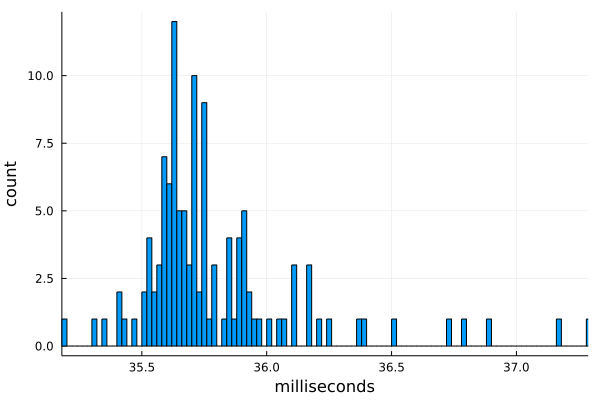

In [98]:
using Statistics  # 导入统计包以计算标准差
t = c_bench.times / 1e6  # 毫秒
m, σ = minimum(t), std(t)

histogram(t, bins=500,
    xlim=(m - 0.01, m + σ),
    xlabel="milliseconds", ylabel="count", label="")

### 2. 使用 `-ffast-math` 的 C 语言

如果我们允许 C 重新安排浮点操作，它就会使用 SIMD 指令(single instruction, multiple data)进行矢量化。

In [99]:
const Clib_fastmath = tempname()   # 创建临时文件

# 同上但是增加了 -ffast-math 标志
open(`gcc -fPIC -O3 -msse3 -xc -shared -ffast-math -o $(Clib_fastmath * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# 定义一个调用这个 C 语言函数的 Julia 函数：
c_sum_fastmath(X::Array{Float64}) = ccall(("c_sum", Clib_fastmath), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum_fastmath (generic function with 1 method)

In [100]:
c_fastmath_bench = @benchmark $c_sum_fastmath($a)

BenchmarkTools.Trial: 139 samples with 1 evaluation.
 Range (min … max):  33.635 ms … 44.735 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.661 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   36.069 ms ±  1.259 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

             ▂            █                                    
  ▂▁▁▁▁▂▂▃▃▄▃████▅▅▃▃▃▁▂▂▂█▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂ ▂
  33.6 ms         Histogram: frequency by time        41.7 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [101]:
d["C -ffast-math"] = minimum(c_fastmath_bench.times) / 1e6  # 毫秒

33.635166

### 3. Python 的内置 `sum` 

`PyCall` 包给 Julia 提供了 Python 接口：

```Julia
using Pkg
Pkg.add("PyCall")
```

In [102]:
using PyCall

In [103]:
# 获得 Python 的内置 "sum" 函数：
pysum = pybuiltin("sum")

PyObject <built-in function sum>

In [104]:
pysum(a) ≈ sum(a)

true

In [105]:
py_list_bench = @benchmark $pysum($a)

BenchmarkTools.Trial: 7 samples with 1 evaluation.
 Range (min … max):  764.478 ms … 789.954 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     778.080 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   777.622 ms ±  10.363 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █       █   █                   █             █           █ █  
  █▁▁▁▁▁▁▁█▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁█▁█ ▁
  764 ms           Histogram: frequency by time          790 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [106]:
d["Python built-in"] = minimum(py_list_bench.times) / 1e6

764.477913

### 4. Python: `numpy` 

**条件允许的情况下利用硬件 "SIMD"**

`numpy` 是一个 Python 的优化过的 C 语言库。
在 Julia 版 Python 中的安装方法为：

```Julia
using Pkg
Pkg.add("PyCall")
```

In [107]:
using Conda
Conda.add("numpy")

┌ Info: Running `conda install -y numpy` in root environment
└ @ Conda /opt/julia-1.6.4/local/share/julia/packages/Conda/x2UxR/src/Conda.jl:127


Solving environment: ...working... done

# All requested packages already installed.



In [108]:
numpy_sum = pyimport("numpy")["sum"]
py_numpy_bench = @benchmark $numpy_sum($a)

BenchmarkTools.Trial: 136 samples with 1 evaluation.
 Range (min … max):  34.703 ms … 48.039 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.774 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   36.918 ms ±  3.137 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

     ▆█▅▁                                                      
  ▃▃▇████▅▁▁▁▃▃▁▁▁▁▁▁▁▂▂▂▁▁▁▂▁▁▁▂▃▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▂▂▃▁▁▃▂▂▂ ▂
  34.7 ms         Histogram: frequency by time        47.3 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [109]:
numpy_sum(a) ≈ sum(a)

true

In [110]:
d["Python numpy"] = minimum(py_numpy_bench.times) / 1e6

34.703289

### 5. Python（手写）

In [111]:
py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

sum_py = py"py_sum"

PyObject <function py_sum at 0x7fb003876700>

In [112]:
py_hand = @benchmark $sum_py($a)

BenchmarkTools.Trial: 6 samples with 1 evaluation.
 Range (min … max):  899.295 ms … 936.203 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     905.996 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   911.844 ms ±  13.964 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █     █   █ █                      █                        █  
  █▁▁▁▁▁█▁▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  899 ms           Histogram: frequency by time          936 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [113]:
sum_py(a) ≈ sum(a)

true

In [114]:
d["Python hand-written"] = minimum(py_hand.times) / 1e6

899.294735

### 6. Julia（内置）

**是直接用 Julia 写的，不是 C！**

In [115]:
@which sum(a)

sum(a::AbstractArray; dims, kw...) in Base at reducedim.jl:873

In [116]:
j_bench = @benchmark sum($a)

BenchmarkTools.Trial: 139 samples with 1 evaluation.
 Range (min … max):  34.535 ms … 42.702 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.654 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   36.002 ms ±  1.310 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

       ▁▃▅█▃▄                                                  
  ▃▃▃▃▅██████▅▃▄▃▁▃▄▁▁▃▁▃▁▁▁▃▃▁▁▁▁▃▃▁▁▁▃▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▃▁▁▃ ▃
  34.5 ms         Histogram: frequency by time        42.1 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [117]:
d["Julia built-in"] = minimum(j_bench.times) / 1e6

34.534804

### 7. Julia（手写）

In [118]:
function mysum(A)   
    s = 0.0  # s = zero(eltype(a))
    for a in A
        s += a
    end
    s
end

mysum (generic function with 1 method)

In [119]:
j_bench_hand = @benchmark mysum($a)

BenchmarkTools.Trial: 140 samples with 1 evaluation.
 Range (min … max):  34.946 ms …  40.983 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.698 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   35.916 ms ± 948.056 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

         █▁                                                     
  ▃▃▃▃▃▆███▅▅▃▃▃▃▁▃▁▂▂▁▁▁▁▁▁▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▃ ▂
  34.9 ms         Histogram: frequency by time         40.8 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [120]:
d["Julia hand-written"] = minimum(j_bench_hand.times) / 1e6

34.945898

### 8. Julia（手写 +  `@simd`）

In [121]:
function mysum_simd(A)   
    s = 0.0  # s = zero(eltype(A))
    @simd for a in A
        s += a
    end
    s
end

mysum_simd (generic function with 1 method)

In [122]:
j_bench_hand_simd = @benchmark mysum_simd($a)

BenchmarkTools.Trial: 139 samples with 1 evaluation.
 Range (min … max):  34.447 ms … 44.120 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     35.523 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   35.910 ms ±  1.533 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▁█▇▅                                                     
  ▃▃▃▄████▇▇▄▃▄▁▃▁▃▁▃▁▁▃▃▁▁▃▁▁▁▁▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▃ ▃
  34.4 ms         Histogram: frequency by time        43.7 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [123]:
d["Julia hand-written simd"] = minimum(j_bench_hand_simd.times) / 1e6
d

Dict{Any, Any} with 8 entries:
  "Julia hand-written simd" => 34.4475
  "C"                       => 35.1897
  "Python numpy"            => 34.7033
  "Julia hand-written"      => 34.9459
  "Python hand-written"     => 899.295
  "Python built-in"         => 764.478
  "Julia built-in"          => 34.5348
  "C -ffast-math"           => 33.6352

## 性能测试小结

In [124]:
for (key, value) in sort(collect(d), by=last)
    println(rpad(key, 25, "."), lpad(round(value; digits=1), 6, "."))
end

C -ffast-math..............33.6
Julia hand-written simd....34.4
Julia built-in.............34.5
Python numpy...............34.7
Julia hand-written.........34.9
C..........................35.2
Python built-in...........764.5
Python hand-written.......899.3
